In [ ]:
!pip -q install towhee pandas scikit-learn scikit-learn opencv-python ipython matplotlib 

In [2]:
import towhee as tw

#initiating datacollection

dc_list = tw.dc(list(range(5)))

In [3]:
#Can work like list

dc_list[:2]

[0, 1]

In [4]:
#datacollection is list of Entity(the basic data type in DataCollection) 
#and each element has num attribute 
#call it with dc_entity1[i].num.

In [5]:
dc_ent1 = tw.dc["ints"]([0, 1, 2])
dc_ent2 = tw.dc["strs"](['one', 'five', 'row'])

In [6]:
dc_ent1[:2]

[<Entity dict_keys(['ints'])>, <Entity dict_keys(['ints'])>]

In [7]:
dc_ent1[:2].ints

In [8]:
#list comprehension

[x.ints for x in dc_ent1]

[0, 1, 2]

In [9]:
#next level

dc_ent3 = tw.dc["ints", "strs"]([[1,"one"],
                              [2,"two"], 
                              [3,"three"]])

In [10]:
[print(x.ints, x.strs) for x in dc_ent3]

1 one
2 two
3 three


[None, None, None]

In [12]:
dc_ent3.show()

ints,strs
1,one
2,two
3,three


In [13]:
tw.dc([0, 1, 2, 3, 4]).map(lambda x: x*2)

[0, 2, 4, 6, 8]

In [14]:
tw.dc([0, 1, 2, 3, 4]).map(str)

['0', '1', '2', '3', '4']

In [ ]:
tw.dc([0, 1, 2, 3, 4]).filter(lambda x: int(x%2)!=0)

[1, 3]

In [ ]:
#Method chaining with functions

(
  tw.dc([0, 1, 2, 3, 4])
          .filter(lambda x: x%3 ==1)
          .map(lambda x: x+5)
          .map(lambda x: x*2)
)

[12, 18]

## Lazy Evaluation

Streamed DataCollection’s computation will run only when we begin consuming items from the DataCollection

In [ ]:
#Streaming is simply 

dc_iter = tw.dc(iter([0, 1, 2, 3]))
dc_iter

In [ ]:
dc_ent3.stream()

## Enter Operator:

https://towhee.io/operators?limit=30&page=1

In [18]:
op = tw.ops.towhee.image_decode()
#image is located in the "Unstructured Exploration Folder."
img = op('/content/cloud-dawn.jpg')

- towhee is the namespace of the operator, and image_decode is the operator name. 

An operator is usually referred to with its full name: **namespace/name.**

Image by <a href="https://pixabay.com/users/hồng_hoàng_sơn-34735808/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=7890229">Hoàng Sơn Hồng</a> from <a href="https://pixabay.com//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=7890229">Pixabay</a>

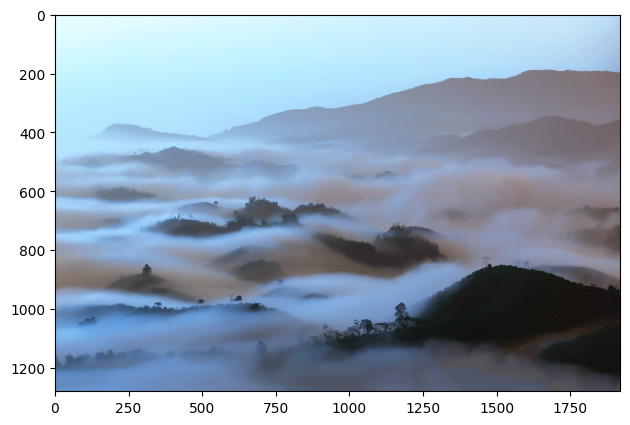

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img)

plt.tight_layout()

In [ ]:
img

In [ ]:
from towhee import register

@register
def mul_5(x):
    return x * 5

tw.ops.mul_5()(2)

10

In [ ]:
(
  tw.dc([0, 1, 2, 3, 4])
      .mul_5()
)

[0, 5, 10, 15, 20]